# Wards

- https://data.gov.uk/dataset/bdc59578-c531-41d2-a90d-b668888c67b1/wards-december-2018-full-extent-boundaries-gb


In [1]:
import geopandas as gpd

shapefile = 'datasets/data_gov_uk/Wards_December_2018_Full_Extent_Boundaries_GB.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)

gdf.head()

objectid     wd18cd          wd18nm wd18nmw   bng_e   bng_n      long  \
0         1  E05000026           Abbey    None  544434  184378  0.081291   
1         2  E05000027          Alibon    None  549247  185196  0.150987   
2         3  E05000028       Becontree    None  546863  185869  0.116912   
3         4  E05000029  Chadwell Heath    None  548266  189340  0.138596   
4         5  E05000030       Eastbrook    None  550774  186272  0.173453   

         lat    st_areasha   st_lengths  \
0  51.539822  1.282925e+06  6244.885015   
1  51.545921  1.364442e+06  6353.917640   
2  51.552601  1.288082e+06  6341.645817   
3  51.583420  3.384190e+06  9603.411571   
4  51.555191  3.450577e+06  8987.802248   

                                            geometry  
0  POLYGON ((0.08550710225358864 51.5370431602157...  
1  POLYGON ((0.1319252357811307 51.54376345461694...  
2  POLYGON ((0.1074560418754761 51.55200231362011...  
3  POLYGON ((0.1470103797472177 51.5756804538549,...  
4  POLYGON ((0.161601914179729 51.5433277536546, ...

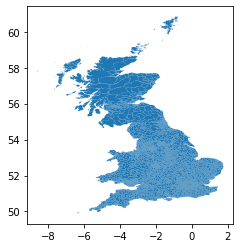

In [10]:
gdf.plot()

In [3]:
gdf.keys()

Index(['objectid', 'wd18cd', 'wd18nm', 'wd18nmw', 'bng_e', 'bng_n', 'long',
       'lat', 'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

In [4]:
prueba = 'Chadwell Heath'
prueba.replace(' ', '-').lower()

'chadwell-heath'

In [5]:
import pandas as pd
# https://candidates.democracyclub.org.uk/uk_results/
df = pd.read_csv('datasets/democracy_club/results-2019-05-02.csv', header=0)

df.head()

election_id  \
0  local.derry-city-and-strabane.2019-05-02   
1  local.derry-city-and-strabane.2019-05-02   
2  local.derry-city-and-strabane.2019-05-02   
3  local.derry-city-and-strabane.2019-05-02   
4  local.derry-city-and-strabane.2019-05-02   

                                     ballot_paper_id  person_id      party_id  \
0  local.derry-city-and-strabane.foyleside.2019-0...      34589           NaN   
1  local.derry-city-and-strabane.foyleside.2019-0...      68862  ynmp-party:2   
2  local.derry-city-and-strabane.foyleside.2019-0...      35060           NaN   
3  local.derry-city-and-strabane.foyleside.2019-0...      49729           NaN   
4  local.derry-city-and-strabane.foyleside.2019-0...      49727           NaN   

                                      party_name          person_name  \
0  Alliance - Alliance Party of Northern Ireland         John Doherty   
1                                    Independent            Sean Carr   
2                  People Before Profit Alliance         Shaun Harkin   
3        SDLP (Social Democratic & Labour Party)  Lillian Seenoi-Barr   
4        SDLP (Social Democratic & Labour Party)   Mary Louise Durkan   

   ballots_cast  is_winner  spoilt_ballots  turnout  \
0           305      False           162.0     57.0   
1          1038       True           162.0     57.0   
2          1259       True           162.0     57.0   
3           721      False           162.0     57.0   
4          1231       True           162.0     57.0   

                                              source  
0  http://www.derrystrabane.com/Subsites/Local-Go...  
1  http://www.derrystrabane.com/Subsites/Local-Go...  
2  http://www.derrystrabane.com/Subsites/Local-Go...  
3  http://www.derrystrabane.com/Subsites/Local-Go...  
4  http://www.derrystrabane.com/Subsites/Local-Go...

In [7]:
df.keys()

Index(['election_id', 'ballot_paper_id', 'person_id', 'party_id', 'party_name',
       'person_name', 'ballots_cast', 'is_winner', 'spoilt_ballots', 'turnout',
       'source'],
      dtype='object')

In [14]:
#df['party_name'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26502 entries, 0 to 26501
Data columns (total 11 columns):
election_id        26502 non-null object
ballot_paper_id    26502 non-null object
person_id          26502 non-null int64
party_id           1743 non-null object
party_name         26502 non-null object
person_name        26502 non-null object
ballots_cast       26502 non-null int64
is_winner          26502 non-null bool
spoilt_ballots     15290 non-null float64
turnout            16917 non-null float64
source             26502 non-null object
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 2.0+ MB


In [13]:
# join the geodataframe with the cleaned up csv dataframe

merged = gdf.set_index('wd18cd').join(df.set_index('WD16CD'))

merged.head()

KeyError: "None of ['WD16CD'] are in the columns"

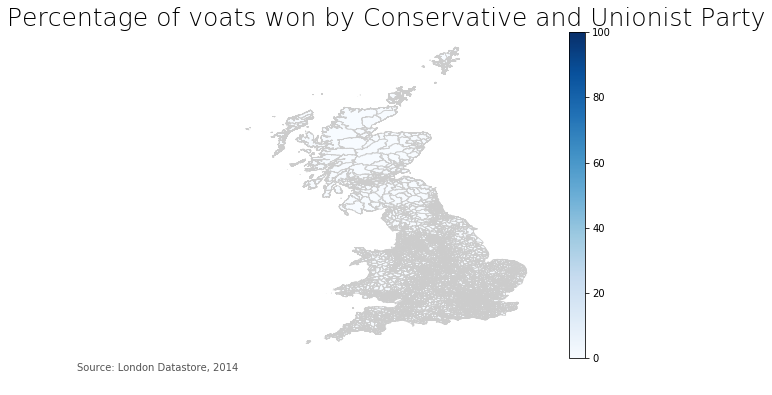

In [38]:
import matplotlib.pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
#variable = 'Labour Party' 
variable = 'Conservative and Unionist Party'

# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
data_title = f"Percentage of votes won by {variable}"
ax.set_title(data_title, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
# uncomment the next two lines to save map to file.
#filename = f"figures/{variable}-map.png"
#fig.savefig(filename, dpi=300)

In [39]:
merged

objectid               wd18nm                     wd18nmw   bng_e  \
E05000026         1                Abbey                        None  544434   
E05000027         2               Alibon                        None  549247   
E05000028         3            Becontree                        None  546863   
E05000029         4       Chadwell Heath                        None  548266   
E05000030         5            Eastbrook                        None  550774   
E05000031         6             Eastbury                        None  546074   
E05000032         7            Gascoigne                        None  544763   
E05000033         8           Goresbrook                        None  548007   
E05000034         9                Heath                        None  549340   
E05000035        10           Longbridge                        None  545276   
E05000036        11           Mayesbrook                        None  547124   
E05000037        12             Parsloes                        None  548150   
E05000038        13                River                        None  549432   
E05000039        14               Thames                        None  547151   
E05000040        15              Valence                        None  548153   
E05000041        16              Village                        None  550361   
E05000042        17            Whalebone                        None  548545   
E05000043        18       Brunswick Park                        None  528433   
E05000044        19            Burnt Oak                        None  520522   
E05000045        20          Childs Hill                        None  524656   
E05000046        21            Colindale                        None  521442   
E05000047        22             Coppetts                        None  528052   
E05000048        23          East Barnet                        None  527475   
E05000049        24        East Finchley                        None  526811   
E05000050        25              Edgware                        None  518863   
E05000051        26  Finchley Church End                        None  524690   
E05000052        27        Garden Suburb                        None  526124   
E05000053        28        Golders Green                        None  523819   
E05000054        29                 Hale                        None  520890   
E05000055        30               Hendon                        None  523084   
...             ...                  ...                         ...     ...   
W05001009      8623            Mold East       Yr Wyddgrug - Dwyrain  323947   
W05001010      8624           Penyffordd                Pen-y-ffordd  330651   
W05001011      8625              Cyncoed                     Cyncoed  319120   
W05001012      8626            Llanishen                   Llanisien  317793   
W05001013      8627           Llanrumney                  Llanrhymni  321814   
W05001014      8628              Pentwyn                    Pen-twyn  320469   
W05001015      8629               Rumney                  Tredelerch  322154   
W05001016      8630           Trowbridge                  Trowbridge  324111   
W05001017      8631       Aberaman South               Aberaman - De  300416   
W05001018      8632               Beddau                    Y Beddau  305811   
W05001019      8633       Church Village                   Gartholwg  308294   
W05001020      8634              Cwmbach                    Cwm-bach  302874   
W05001021      8635                Graig                     Y Graig  306267   
W05001022      8636     Llantrisant Town            Tref Llantrisant  304843   
W05001023      8637      Llantwit Fardre         Llanilltud Faerdref  308553   
W05001024      8638    Mountain Ash East        Aberpennar - Dwyrain  305278   
W05001025      8639         Talbot Green               Tonysguboriau  304064   
W05001026      8640           Tyn-y-nant                 Ty'n-y-nant  306613   
W05001027  